In [7]:
!pip install kaggle

In [11]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [15]:
!kaggle competitions download -c cifar-10

 98% 700M/715M [00:09<00:00, 83.1MB/s]
100% 715M/715M [00:09<00:00, 77.3MB/s]


In [16]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [17]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [19]:
!ls

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [21]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()     #archive.extractall(path='/content/Training Data')
archive.close()

In [22]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [23]:
filenames = os.listdir('/content/train')

In [24]:
type(filenames)

list

In [25]:
len(filenames)

50000

In [26]:
print(filenames[0:5])
print(filenames[-5:])

['46484.png', '44101.png', '45845.png', '41750.png', '37994.png']
['43173.png', '37567.png', '17249.png', '607.png', '19636.png']


In [27]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [28]:
labels_df.shape

(50000, 2)

In [30]:
labels_df[labels_df['id'] == 6969]

,id,label
6968,6969,frog


In [31]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [32]:
labels_df['label'].value_counts()

label
frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: count, dtype: int64

In [33]:
labels_df['label']

0              frog
1             truck
2             truck
3              deer
4        automobile
            ...    
49995          bird
49996          frog
49997         truck
49998    automobile
49999    automobile
Name: label, Length: 50000, dtype: object

In [34]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

In [35]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


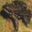

In [36]:
# displaying sample image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/6969.png')
cv2_imshow(img)

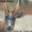

In [37]:
# displaying sample image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/36969.png')
cv2_imshow(img)

In [38]:
labels_df[labels_df['id'] == 36969]

,id,label
36968,36969,deer


In [39]:
id_list = list(labels_df['id'])

In [40]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


In [41]:
train_data_folder = '/content/train/'

data = []

for id in id_list:

  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [42]:
type(data)

list

In [43]:
len(data)

50000

In [44]:
type(data[0])

numpy.ndarray

In [45]:
data[0].shape

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
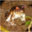

In [46]:
data[0]

In [47]:
X = np.array(data)
Y = np.array(labels)

In [48]:
type(X)

numpy.ndarray

In [49]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [51]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [52]:
X_train_scaled

array([[[[0.81960784, 0.82352941, 0.79607843],
         [0.83529412, 0.83921569, 0.81960784],
         [0.85490196, 0.85882353, 0.84313725],
         ...,
         [0.49803922, 0.29019608, 0.15294118],
         [0.47843137, 0.26666667, 0.1372549 ],
         [0.45490196, 0.24705882, 0.1254902 ]],

        [[0.82352941, 0.82352941, 0.79215686],
         [0.83529412, 0.83921569, 0.81176471],
         [0.85490196, 0.8627451 , 0.83921569],
         ...,
         [0.48627451, 0.2745098 , 0.1372549 ],
         [0.4745098 , 0.2627451 , 0.12941176],
         [0.48235294, 0.27058824, 0.14117647]],

        [[0.80784314, 0.80392157, 0.76470588],
         [0.81960784, 0.81960784, 0.79215686],
         [0.83529412, 0.84313725, 0.81960784],
         ...,
         [0.48627451, 0.2745098 , 0.14509804],
         [0.51372549, 0.30196078, 0.16470588],
         [0.51372549, 0.30588235, 0.16078431]],

        ...,

        [[0.49803922, 0.42352941, 0.38039216],
         [0.54117647, 0.47843137, 0.43137255]

In [53]:
import tensorflow as tf
from tensorflow import keras

In [54]:
num_of_classes = 10

# setting up the layers of Neural Network

model = keras.Sequential([

    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
])

In [55]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [57]:
model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 5s 4ms/step - loss: 1.6573 - acc: 0.4106 - val_loss: 1.6560 - val_acc: 0.3990
Epoch 2/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.6423 - acc: 0.4156 - val_loss: 1.6876 - val_acc: 0.3935
Epoch 3/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.6391 - acc: 0.4164 - val_loss: 1.6683 - val_acc: 0.3943
Epoch 4/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.6327 - acc: 0.4193 - val_loss: 1.6902 - val_acc: 0.3977
Epoch 5/10
1125/1125 [==============================] - 4s 3ms/step - loss: 1.6276 - acc: 0.4226 - val_loss: 1.6668 - val_acc: 0.3997
Epoch 6/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.6231 - acc: 0.4219 - val_loss: 1.6708 - val_acc: 0.4072
Epoch 7/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.6201 - acc: 0.4237 - val_loss: 1.6517 - val_acc: 0.4002
Epoch 8/10
1125/1125 [==============================] - 3s 3ms

In [58]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [59]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

94765736/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                      

In [60]:
num_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [65]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=5e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [67]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
1125/1125 [==============================] - 440s 391ms/step - loss: 0.6516 - acc: 0.8353 - val_loss: 0.2775 - val_acc: 0.9277
Epoch 2/5
1125/1125 [==============================] - 441s 392ms/step - loss: 0.4384 - acc: 0.9007 - val_loss: 0.2631 - val_acc: 0.9260
Epoch 3/5
1125/1125 [==============================] - 433s 385ms/step - loss: 0.3130 - acc: 0.9345 - val_loss: 0.2308 - val_acc: 0.9352
Epoch 4/5
1125/1125 [==============================] - 433s 385ms/step - loss: 0.2359 - acc: 0.9528 - val_loss: 0.2162 - val_acc: 0.9413
Epoch 5/5
1125/1125 [==============================] - 440s 391ms/step - loss: 0.1874 - acc: 0.9634 - val_loss: 0.2434 - val_acc: 0.9300


In [68]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

313/313 [==============================] - 38s 116ms/step - loss: 0.2577 - acc: 0.9289
Test Accuracy = 0.9289000034332275


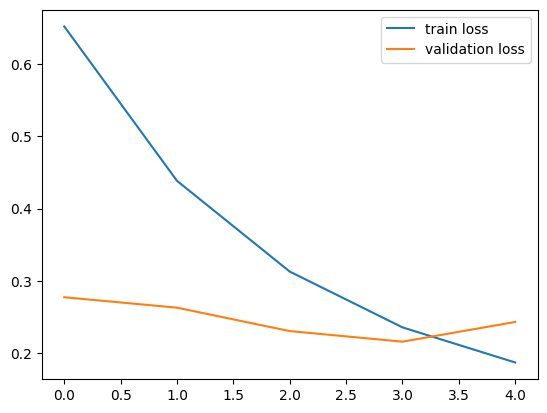

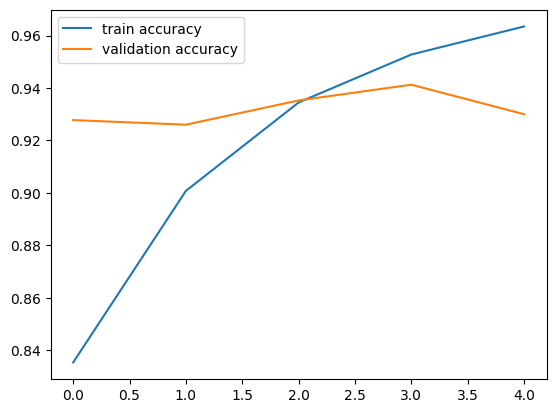

In [69]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()